# Linear regression implementation
- Gradient Descent
- Normal Equation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1-1 - Single feature dataset

In [2]:
df = pd.read_csv('datasets/ex1data1.txt', header=None, names=['population','profit'])
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
X = df.drop('profit', axis=1).values
y = df[['profit']].values
m = df.shape[0]

### EDA

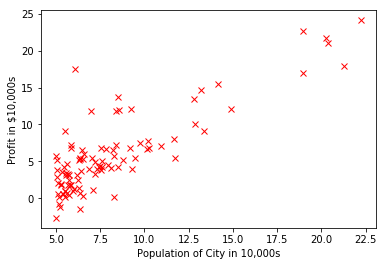

In [4]:
plt.plot(X, y, 'rx');
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

## Cost Function
**m** = number of training examples
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$$
where the hypothesis $h_\theta(x)$ is given by the linear model
$$h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$
But when we're talking about X (m by n matrix when m is the number of training examples and n is the number of features). Theta is a vector in this case.
$$ h = X * \theta $$

In [5]:
def computeCost(X, y, theta):
    m = len(y)
    d = X * theta -y
    J = (np.transpose(d) * d)/(2*m)
    return np.asscalar(J)

In [6]:
# attach vector of x0 (x0=1)
X = np.hstack((np.ones((m,1)),X))

In [7]:
# compute cost function with theta = [0; 0]
theta = np.matrix('0;0')
computeCost(X, y, theta)

32.072733877455676

In [8]:
# compute cost function with theta = [-1; 2]
computeCost(X, y, np.matrix('-1;2'))

54.24245508201238

## Gradient Descent
The objective of linear regression is to minimize the cost function<br/>

Recall that the parameters of a model are the $\theta_j$ values. These are the values to adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update
$$ \theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$ (simultaneously update $\theta_j$ for all j).

In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    j_hist = np.zeros(num_iters)
    Xt = np.transpose(X)
    for i in np.arange(num_iters):
        delta = 1/m * Xt * (X * theta - y)
        theta = theta - alpha * delta
        
        # save cost J history for each iteration
        j_hist[i] = computeCost(X, y, theta)
    return theta, j_hist

Find optimal theta using Gradient Descent with alpha = 0.01 for 1,500 iterations

In [10]:
iterations = 1500
alpha = 0.01

theta, j_hist = gradientDescent(X, y, theta, alpha, iterations)

In [11]:
theta

matrix([[-3.63029144],
        [ 1.16636235]])

### Cost function for each iteration
To see if it converges properly

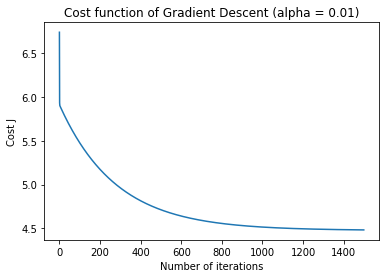

In [12]:
plt.plot(np.arange(iterations), j_hist)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Cost function of Gradient Descent (alpha = 0.01)');

### Plot the linear fit

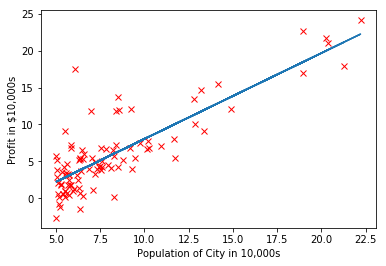

In [13]:
plt.plot(X[:,1] , y, 'rx');
plt.plot(X[:,1], X*theta,'-')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

### Predict

In [14]:
# Predict values for population size = 35,000
np.asscalar([1 ,3.5] * theta) * 10000

4519.767867701758

In [15]:
# Predict values for population size = 70,000
np.asscalar([1, 7] * theta) * 10000

45342.45012944712

## Exercise 1-2 - Multivariage linear regression
Training set of housing prices in Portland, Oregon. The first column is the size of the house (sq.ft.) and the second column is the nmber of bedrooms, and the third column is the price of the house.

In [16]:
df = pd.read_csv('datasets/ex1data2.txt', header=None, names=['size','bedrooms','price'])
df.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Feature Normalization

In [17]:
X = df.drop('price',axis=1).values
y = df[['price']].values
m = X.shape[0]

In [18]:
def featureNormalize(X):
    X_norm = X.astype(float)
    n = X.shape[1]
    mu = np.zeros(n)
    sigma = np.zeros(n)
    
    # normalize and store mean and std values
    for i in np.arange(n):
        mu[i] = np.mean(X_norm[:,i])
        sigma[i] = np.std(X_norm[:,i])
        X_norm[:,i] = (X_norm[:,i] - mu[i])/sigma[i]
        
    return X_norm, mu, sigma
# Normalize
X_norm, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = np.hstack((np.ones((m,1)), X_norm))

# preview current X
X[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [19]:
# Init Theta and run Gradient Descent
theta = np.matrix(np.zeros((X.shape[1],1)))
theta

matrix([[0.],
        [0.],
        [0.]])

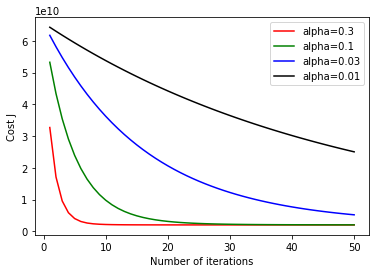

In [20]:
num_iters = 50
t1, j1 = gradientDescent(X, y, theta, 0.3, num_iters)
t2, j2 = gradientDescent(X, y, theta, 0.1, num_iters)
t3, j3 = gradientDescent(X, y, theta, 0.03, num_iters)
t4, j4 = gradientDescent(X, y, theta, 0.01, num_iters)

# plot J for each alpha
plt.plot(np.arange(num_iters) + 1, j1, 'r', label='alpha=0.3');
plt.plot(np.arange(num_iters) + 1, j2, 'g', label='alpha=0.1');
plt.plot(np.arange(num_iters) + 1, j3, 'b', label='alpha=0.03');
plt.plot(np.arange(num_iters) + 1, j4, 'k', label='alpha=0.01');
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend();

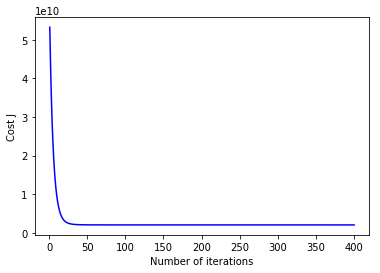

In [21]:
# choose alpha = 0.1
theta = np.matrix(np.zeros((X.shape[1],1)))
alpha = 0.1
num_iters = 400
theta, j_hist = gradientDescent(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(num_iters) + 1, j_hist, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J');

In [22]:
theta

matrix([[340412.65957447],
        [109447.79558639],
        [ -6578.3539709 ]])

## Predict
Remember to use the same values of mean and std used in feature normalization before.

In [23]:
# Estimate the price of a 1650 sq-ft, 3 br house
new_x = np.matrix([1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]])

# predict
price = np.asscalar(new_x * theta)
price

293081.4645291686

# Normal Equations
$\theta = (X^TX)^{-1}X^Ty$

Using this formula does not require any feature scaling

In [24]:
def normalEquation(X, y):
    theta = np.matrix(np.zeros((X.shape[1], 1)))
    X = np.matrix(X)
    Xt = np.transpose(X)
    theta = np.linalg.pinv(Xt*X) * Xt * y
    return theta
    
theta_normaleq = normalEquation(X, y)
theta_normaleq

matrix([[340412.65957447],
        [109447.79646964],
        [ -6578.35485416]])

In [25]:
price2 = np.asscalar(new_x * theta_normaleq)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n{}'.format(price))
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n{}'.format(price2))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
293081.4645291686
Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
293081.4643348961


### Compare with scikit-learn

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X_train = df.drop('price',axis=1).values
y = df['price'].values
X_train[:10]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4],
       [1985,    4],
       [1534,    3],
       [1427,    3],
       [1380,    3],
       [1494,    3]], dtype=int64)

In [27]:
X_train = X_train.astype(float)

steps = [('scaler', StandardScaler()),
         ('reg', LinearRegression())]

pipeline = Pipeline(steps)
pipeline.fit(X_train, y)

# Test with the same data
X_test = np.array([[1650.0, 3.0]])

price3 = pipeline.predict(X_test)[0]
print('Predicted price of a 1650 sq-ft, 3 br house (using scikit-learn):\n{}'.format(price3))

Predicted price of a 1650 sq-ft, 3 br house (using scikit-learn):
293081.4643348962
